<b>Importing basic required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('HR-Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that there are no null values in dataset.

In [7]:
#checcking duplicates in employee number
df['EmployeeNumber'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: EmployeeNumber, Length: 1470, dtype: bool

In [8]:
# Dropping column which are unnecessary
df.pop('EmployeeNumber')
df.pop('EmployeeCount')
df.pop('StandardHours')
df.pop('Over18')

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object

In [9]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
df.shape

(1470, 31)

In [11]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
#calculating attrition rate
attrition_rate=df.Attrition.value_counts() /1470
print('The attrition rate is {}%'.format(attrition_rate[1]*100))

The attrition rate is 16.122448979591837%


# Exploratory Data Analysis

<AxesSubplot:>

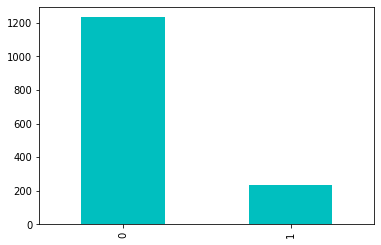

In [13]:
df['Attrition'].value_counts().plot(kind='bar',color='c')

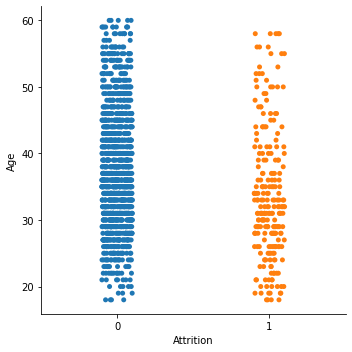

In [14]:
#attrition vs age
sns.catplot('Attrition','Age',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

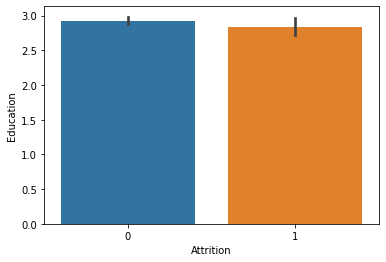

In [15]:
#attrition vs education
sns.barplot('Attrition','Education',data=df)

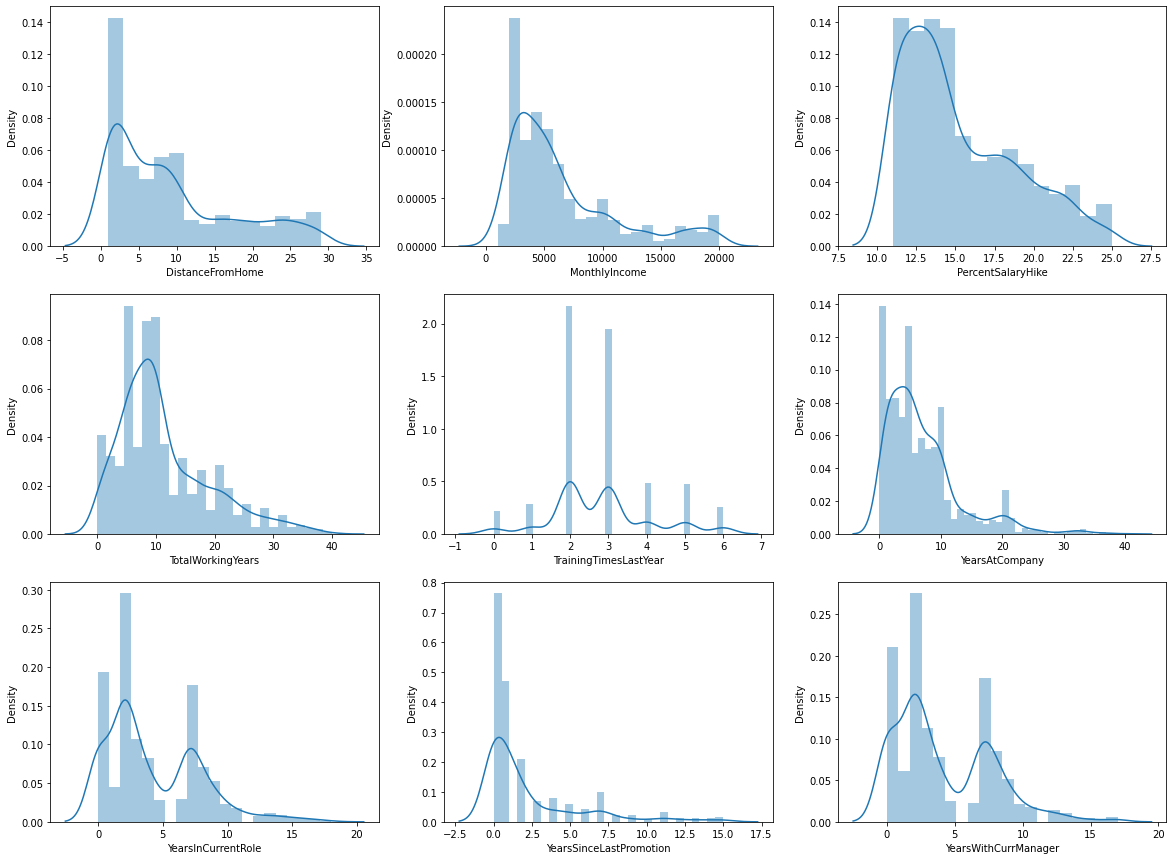

In [16]:
df_numerical=df[['DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
plt.figure(figsize=(20,15))
n=1
for col in df_numerical.columns:
    ax=plt.subplot(3,3,n)
    sns.distplot(df_numerical[col])
    plt.xlabel(col,fontsize=10)
    n+=1


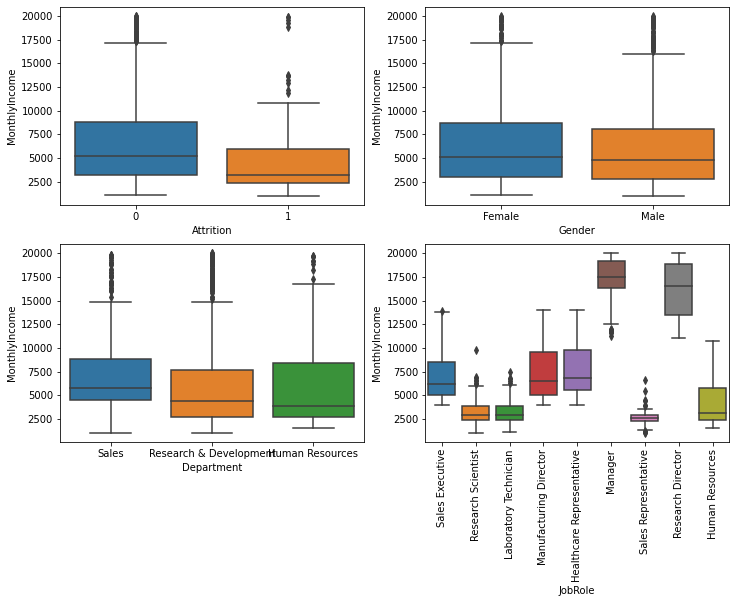

In [17]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df,ax=ax[0,0])
sns.boxplot(x='Gender',y='MonthlyIncome',data=df,ax=ax[0,1])
plt.xticks(rotation=90)
sns.boxplot(x='Department',y='MonthlyIncome',data=df,ax=ax[1,0])
plt.xticks(rotation=90)
sns.boxplot(x='JobRole',y='MonthlyIncome',data=df,ax=ax[1,1])
plt.show()

From the correlation table we see that monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.

In [19]:
df.drop(['DailyRate','HourlyRate','MonthlyRate'],inplace=True,axis=1)

Some other conclusions we get from the correlation table:

     1.Job level and total working years are highly correlated.
     2.Monthly Income and total working years are highly correlated.
     3.Performance rating and percentage salary hike are highly correlated.
     4.Years in current role and years at company are highly correlated.
     5.Years with current manager and years at company are highly correlated.

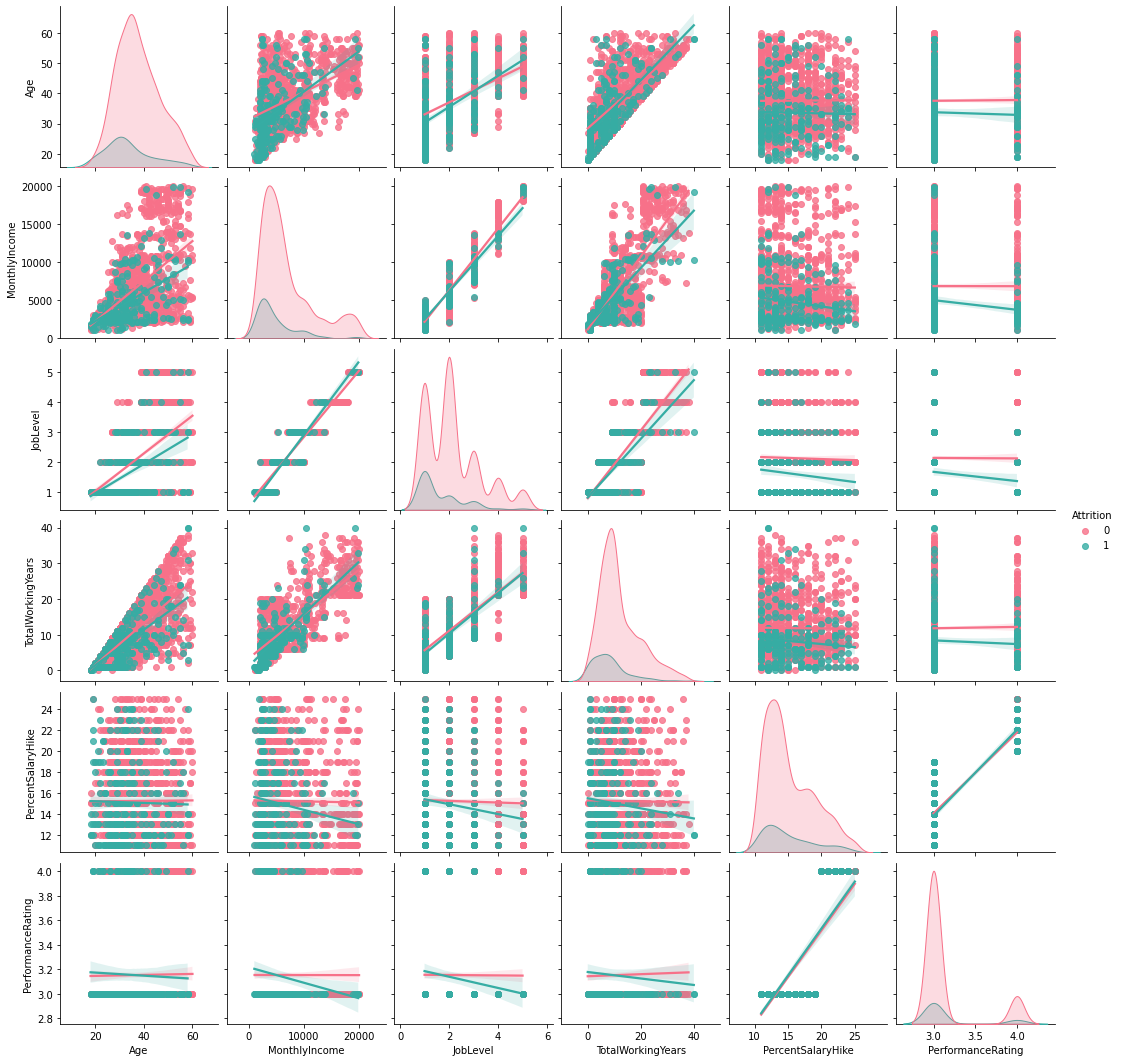

In [20]:
continuous = ['Attrition', 'Age', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'PercentSalaryHike',
              'PerformanceRating']
sns.pairplot(df[continuous],kind='reg',diag_kind='kde',hue='Attrition',palette='husl')
plt.show()

# Model Building

<H3>Data Pre-processing
    

In [21]:
df_cat=df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
df_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [22]:
#Encoding categorical columns with onehotencoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df_cat=ohe.fit_transform(df_cat).toarray()
df_cat.shape

(1470, 26)

In [23]:
df_cat=pd.DataFrame(df_cat)
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobLevel,JobLevel,NumCompaniesWorked,OverTime,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,3,2,2,2,8,1,...,3,1,0,8,0,1,4,6,0,5
1,49,8,1,3,2,2,2,2,1,0,...,4,4,1,10,3,3,7,10,1,7
2,37,2,2,4,2,1,1,1,6,1,...,3,2,0,7,3,3,0,0,0,0
3,33,3,4,4,3,1,1,1,1,1,...,3,3,0,8,3,3,7,8,3,0
4,27,2,1,1,3,1,1,1,9,0,...,3,4,1,6,3,3,2,2,2,2


In [25]:
df_all=pd.concat([df_cat,df_num],axis=1)
df_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,4,6,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,7,10,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,7,8,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


Lets use sklearn's MinMaxScaler to transform the data by scaling each resource to an interval between 0 and 1 to ensure that our machine learning model handles the features equally

In [26]:
#Scaling features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x=scaler.fit_transform(df_all)
x

array([[0.        , 0.        , 1.        , ..., 0.15      , 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.25      , 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.15      , 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.225     , 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.1       , 0.06666667,
        0.11764706]])

In [27]:
#separating target variable
y=df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<b>Finding best Random state

In [29]:
maxAcc=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i

print('Best Random state is ',maxRS,'with accuracy',maxAcc)

Best Random state is  40 with accuracy 0.8830462375339981


<H3>Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

#printing shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 47)
(368, 47)
(1102,)
(368,)


In [31]:
y_train.value_counts()

0    922
1    180
Name: Attrition, dtype: int64

Here we can see that our dataset is imbalenced we will balance it using SMOTE.

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE(0.75)

print('Shape before oversampling {}'.format(Counter(y_train)))

x_train,y_train=sm.fit_resample(x_train,y_train)

print('Shape after oversampling {}'.format(Counter(y_train)))

Shape before oversampling Counter({0: 922, 1: 180})
Shape after oversampling Counter({0: 922, 1: 691})


<h3>Model Selection

<B>Logistic Regression

Training accuracy  79.97520148791072
Testing accuracy 83.69565217391305
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       311
           1       0.48      0.72      0.58        57

    accuracy                           0.84       368
   macro avg       0.71      0.79      0.74       368
weighted avg       0.87      0.84      0.85       368



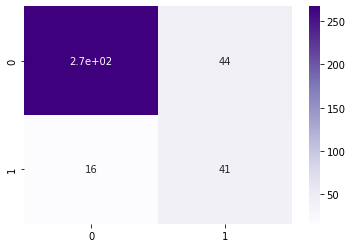

In [33]:
lr= LogisticRegression()

#fiiting model and predicting from test set
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

#printing accuracy
print('Training accuracy ',lr.score(x_train,y_train)*100)
print('Testing accuracy' ,lr.score(x_test,y_test)*100)

#classification report
print(classification_report(y_test,pred_lr))

#confusion matrix
cm=confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,annot=True,cmap='Purples')
plt.show()

<b>Decision Tree Classifier

Training accuracy  100.0
Testing accuracy 77.71739130434783
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       311
           1       0.31      0.35      0.33        57

    accuracy                           0.78       368
   macro avg       0.59      0.60      0.60       368
weighted avg       0.79      0.78      0.78       368



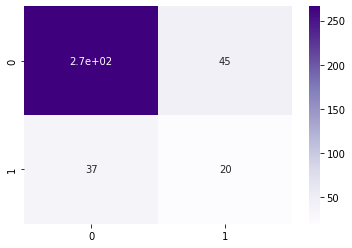

In [34]:
dt=DecisionTreeClassifier()

#fitting model and predicting from test set
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

#printing accuracy
print('Training accuracy ',dt.score(x_train,y_train)*100)
print('Testing accuracy' ,dt.score(x_test,y_test)*100)

#classification report
print(classification_report(y_test,pred_dt))

#confusion matrix
cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(cm,annot=True,cmap='Purples')
plt.show()

<b>Random Forest Classifier

Training accuracy  100.0
Testing accuracy 86.95652173913044
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       311
           1       0.71      0.26      0.38        57

    accuracy                           0.87       368
   macro avg       0.80      0.62      0.66       368
weighted avg       0.85      0.87      0.84       368



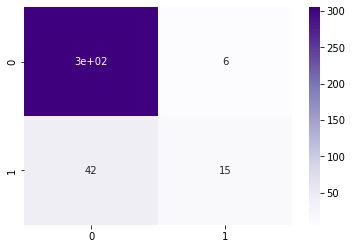

In [35]:
rf=RandomForestClassifier()

#fitting and predicting
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

#printing accuracy
print('Training accuracy ',rf.score(x_train,y_train)*100)
print('Testing accuracy' ,rf.score(x_test,y_test)*100)

#classification report
print(classification_report(y_test,pred_rf))

#confusion matrix
cm=confusion_matrix(y_test,pred_rf)
sns.heatmap(cm,annot=True,cmap='Purples')
plt.show()

<b>Support Vector Machine

Training accuracy  92.87042777433354
Testing accuracy 86.1413043478261
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       311
           1       0.55      0.56      0.56        57

    accuracy                           0.86       368
   macro avg       0.74      0.74      0.74       368
weighted avg       0.86      0.86      0.86       368



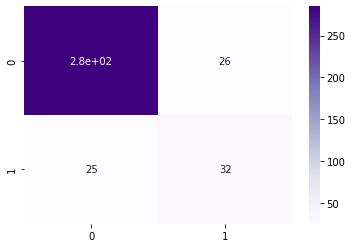

In [36]:
svc=SVC()

#fitting and predicting
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

#printing accuracy
print('Training accuracy ',svc.score(x_train,y_train)*100)
print('Testing accuracy' ,svc.score(x_test,y_test)*100)

#classification report
print(classification_report(y_test,pred_svc))

#confusion matrix
cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(cm,annot=True,cmap='Purples')
plt.show()

<b>KNN Classifier

In [37]:
#selecting best kvalue 
best_kvalue=0
best_score=0

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    sc=knn.score(x_train,y_train)
    if sc>best_score:
        best_score=sc
        best_kvalue=i
print('Best KNN value is {}'.format(best_kvalue))
print('Training accuracy is {}%'.format(round(best_score,2)*100))

Best KNN value is 1
Training accuracy is 100.0%


In [38]:
pred_knn=knn.predict(x_test)

#classification report
print(classification_report(y_test,pred_knn))

#accuracy
print('Testing accuracy ',knn.score(x_test,y_test)*100)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       311
           1       0.28      0.58      0.38        57

    accuracy                           0.71       368
   macro avg       0.59      0.65      0.59       368
weighted avg       0.81      0.71      0.74       368

Testing accuracy  70.65217391304348


### Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score of Logistic Regression:',scr.mean()*100)

Cross validation score of Logistic Regression: 87.82312925170068


In [40]:
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of Decision Tree:',scr.mean()*100)

Cross validation score of Decision Tree: 78.36734693877551


In [41]:
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score of Random Forest:',scr.mean()*100)

Cross validation score of Random Forest: 85.44217687074828


In [42]:
scr=cross_val_score(svc,x,y,cv=5)
print('Cross validation score of Support Vector Machine:',scr.mean()*100)

Cross validation score of Support Vector Machine: 85.64625850340136


In [43]:
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score of KNN Classifier:',scr.mean()*100)

Cross validation score of KNN Classifier: 84.28571428571429


Logistic Regression is performing better than other.So we will continue with Logistic Regression

### Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

parameters= {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [20, 50, 100, 200, 500, 1000]}
gcv=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy',cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_iter': 20, 'solver': 'lbfgs'}

In [52]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8396739130434783

### ROC AUC Curve

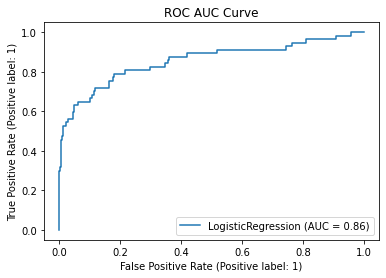

In [53]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

Final accuracy is 83% with 86% AOC score for Logistic Regression

### Saving the model

In [56]:
import joblib
joblib.dump(gcv.best_estimator_,'HR_model.pkl')

['HR_model.pkl']

In [58]:
job=joblib.load('HR_model.pkl')
job

LogisticRegression(max_iter=20)